# Lecture-17 Retrieving Data from Web

### Retrieving web pages using HTTP protocol

In [1]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

mysock.connect(('data.pr4e.org', 80))

cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()

mysock.send(cmd)

while True:
    data = mysock.recv(512)
    
    if len(data) < 1:
        break
    
    print(data.decode(),end='')

mysock.close()

HTTP/1.1 200 OK
Date: Sat, 31 Aug 2019 01:18:03 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


### Retrieve Images using HTTP

5120 5120
5120 10240
4280 14520
5120 19640
5120 24760
5120 29880
5120 35000
5120 40120
536 40656
5120 45776
2140 47916
5120 53036
5120 58156
5120 63276
612 63888
1452 65340
5120 70460
5044 75504
2904 78408
1452 79860
5120 84980
3592 88572
4356 92928
2904 95832
5120 100952
688 101640
5120 106760
5120 111880
2828 114708
5120 119828
5120 124948
4280 129228
5120 134348
5120 139468
5120 144588
2064 146652
5120 151772
2140 153912
5120 159032
5120 164152
5120 169272
5120 174392
5120 179512
5120 184632
2676 187308
5120 192428
5044 197472
5120 202592
2140 204732
5120 209852
5044 214896
5120 220016
5120 225136
4280 229416
1192 230608
Header length 394
HTTP/1.1 200 OK
Date: Sat, 31 Aug 2019 01:30:07 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Mon, 15 May 2017 12:27:40 GMT
ETag: "38342-54f8f2e5b6277"
Accept-Ranges: bytes
Content-Length: 230210
Vary: Accept-Encoding
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection

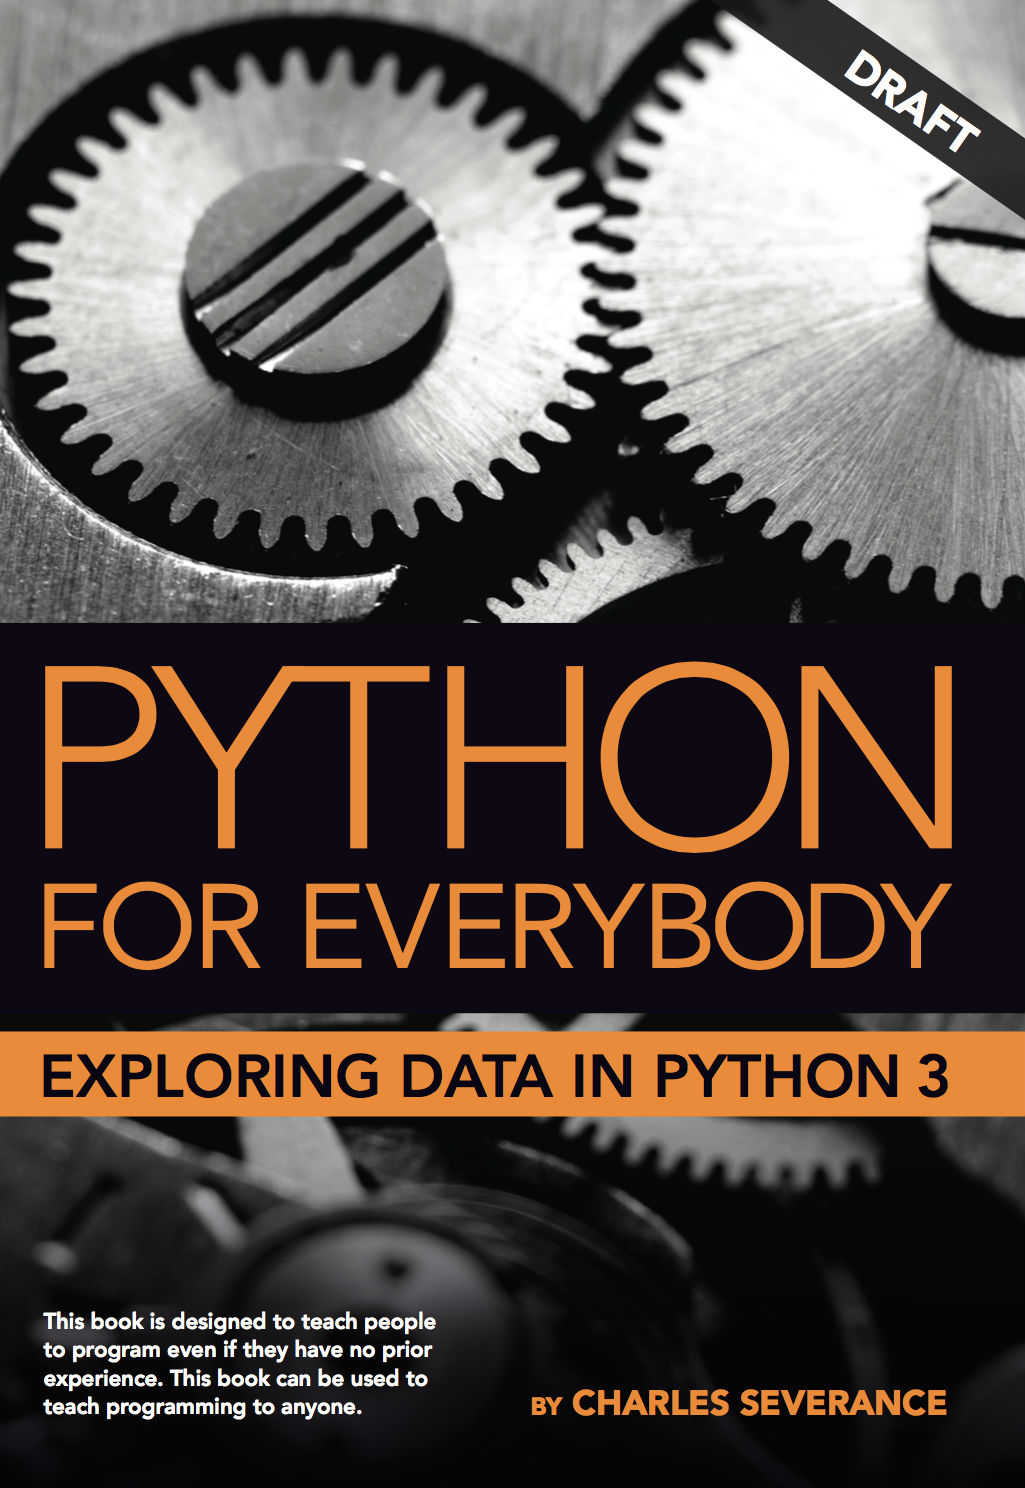

In [5]:
import socket
import time

HOST = 'data.pr4e.org'
PORT = 80
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect((HOST, PORT))
mysock.sendall(b'GET http://data.pr4e.org/cover3.jpg HTTP/1.0\r\n\r\n')

count = 0
picture = b""

while True:
    data = mysock.recv(5120)
    if len(data) < 1: 
        break
    
    #time.sleep(0.25)
    count = count + len(data)
    print(len(data), count)
    picture = picture + data

mysock.close()

# Look for the end of the header (2 CRLF)
pos = picture.find(b"\r\n\r\n")
print('Header length', pos)
print(picture[:pos].decode())

# Skip past the header and save the picture data
picture = picture[pos+4:]
fhand = open("stuff.jpg", "wb")
fhand.write(picture)
fhand.close()

# you can display stuff.jpg as well
from IPython.display import Image
display(Image(filename='stuff.jpg'))

### Retrieving web pages using urllib

In [6]:
import urllib.request

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
for line in fhand:
    print(line.decode().strip())

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


### Print word frequency of a web page

In [7]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')

counts = dict()
for line in fhand:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1
print(counts)

{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


### Walk-Through

#### Use urllib to retrieve the document from a URL, display up to 3000 characters, and count the overall number of characters in the document. Don’t worry about the headers for this exercise, simply show the first 3000 characters of the document contents.

### Retrieve Images and save it locally

In [11]:
import urllib.request, urllib.parse, urllib.error

img = urllib.request.urlopen('http://data.pr4e.org/cover3.jpg').read()
fhand = open('cover3.jpg', 'wb')
fhand.write(img)
fhand.close()

# show the save file too
from IPython.display import Image
#display(Image(filename='cover3.jpg'))

### Retrive images block by block to avoid system crash

In [10]:
import urllib.request, urllib.parse, urllib.error

img = urllib.request.urlopen('http://data.pr4e.org/cover3.jpg')
fhand = open('cover3.jpg', 'wb')
size = 0
while True:
    info = img.read(100000)
    if len(info) < 1: 
        break
    size = size + len(info)
    fhand.write(info)

print(size, 'characters copied.')
fhand.close()

230210 characters copied.


### Parsing HTML using regular expressions

In [12]:
# Search for link values within URL input
import urllib.request, urllib.parse, urllib.error
import re
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter website:> ')
html = urllib.request.urlopen(url).read()
links = re.findall(b'href="(http[s]?://.*?)"', html)
for link in links:
    print(link.decode())


Enter website:> https://docs.python.org
https://docs.python.org/3/index.html
https://www.python.org/
https://docs.python.org/3.9/
https://docs.python.org/3.8/
https://docs.python.org/3.7/
https://docs.python.org/3.6/
https://docs.python.org/3.5/
https://docs.python.org/2.7/
https://www.python.org/doc/versions/
https://www.python.org/dev/peps/
https://wiki.python.org/moin/BeginnersGuide
https://wiki.python.org/moin/PythonBooks
https://www.python.org/doc/av/
https://www.python.org/
https://www.python.org/psf/donations/
http://sphinx.pocoo.org/


### Parsing HTML using BeautifulSoup

In [13]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter website:> ')
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))


Enter website:> https://www.python.org
#content
#python-network
/
/psf-landing/
https://docs.python.org
https://pypi.python.org/
/jobs/
/community/
#top
/
/psf/donations/
#site-map
#
javascript:;
javascript:;
javascript:;
#
https://www.facebook.com/pythonlang?fref=ts
https://twitter.com/ThePSF
/community/irc/
/about/
/about/apps/
/about/quotes/
/about/gettingstarted/
/about/help/
http://brochure.getpython.info/
/downloads/
/downloads/
/downloads/source/
/downloads/windows/
/downloads/mac-osx/
/download/other/
https://docs.python.org/3/license.html
/download/alternatives
/doc/
/doc/
/doc/av
https://wiki.python.org/moin/BeginnersGuide
https://devguide.python.org/
https://docs.python.org/faq/
http://wiki.python.org/moin/Languages
http://python.org/dev/peps/
https://wiki.python.org/moin/PythonBooks
/doc/essays/
/community/
/community/survey
/community/diversity/
/community/lists/
/community/irc/
/community/forums/
/psf/annual-report/2019/
/community/workshops/
/community/sigs/
/community/l

### Walk-Through

#### program to extract and count para-graph (p) tags from the retrieved HTML document and display the count of the paragraphs as the output of your program. Do not display the paragraph text, only count them. Test your program on several small web pages as well as some larger web pages.

### Retrieve all anchor tags

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter :> ')
html = urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, "html.parser")

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    # Look at the parts of a tag
    print('TAG:', tag)
    print('URL:', tag.get('href', None))
    print('Contents:', tag.contents[0])
    print('Attrs:', tag.attrs)


Enter - http://www.dr-chuck.com/page1.htm
TAG: <a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>
URL: http://www.dr-chuck.com/page2.htm
Contents: 
Second Page
Attrs: {'href': 'http://www.dr-chuck.com/page2.htm'}


## XML Data Processing

### Extract xml elements

In [15]:
import xml.etree.ElementTree as ET

data = '''
<person>
  <name>Chuck</name>
  <phone type="intl">
    +1 734 303 4456
  </phone>
  <email hide="yes" />
</person>'''

tree = ET.fromstring(data)
print('Name:', tree.find('name').text)
print('Attr:', tree.find('email').get('hide'))

Name: Chuck
Attr: yes


### Looping xml data

In [16]:
import xml.etree.ElementTree as ET

input = '''
<stuff>
  <users>
    <user x="2">
      <id>001</id>
      <name>Chuck</name>
    </user>
    <user x="7">
      <id>009</id>
      <name>Brent</name>
    </user>
  </users>
</stuff>'''

stuff = ET.fromstring(input)
lst = stuff.findall('users/user')  #include parent level elements 'users'
print('User count:', len(lst))

for item in lst:
    print('Name', item.find('name').text)
    print('Id', item.find('id').text)
    print('Attribute', item.get('x'))

User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7


## JavaScript Object Notation(JSON) Data Processing

In [17]:
import json

data = '''
[
  { "id" : "001",
    "x" : "2",
    "name" : "Chuck"
  } ,
  { "id" : "009",
    "x" : "7",
    "name" : "Brent"
  }
]'''

info = json.loads(data)
print('User count:', len(info))

for item in info:
    print('Name', item['name'])
    print('Id', item['id'])
    print('Attribute', item['x'])

User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7


## Retrieve Twitter user's timeline data

In [1]:
import urllib.request, urllib.parse, urllib.error
import twurl
import ssl

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/statuses/user_timeline.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '2'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()
    print(data[:250])
    headers = dict(connection.getheaders())
    # print headers
    print('Remaining', headers['x-rate-limit-remaining'])


Enter Twitter Account:drsris
Retrieving https://api.twitter.com/1.1/statuses/user_timeline.json?oauth_consumer_key=ObG0rFIZON5mHUcXHbwhBIB5A&oauth_timestamp=1567238775&oauth_nonce=67675819&oauth_version=1.0&screen_name=drsris&count=2&oauth_token=836931359880835072-srBegAOc9dC3oWWoJFKrvlBzng8Trk6&oauth_signature_method=HMAC-SHA1&oauth_signature=%2BG8CGqI62Sq4nALY4n3ceoCzxog%3D
[{"created_at":"Wed Aug 28 11:28:42 +0000 2019","id":1166673959112380416,"id_str":"1166673959112380416","text":"@Wikipedia is close to my heart. Most of what I know is from #Wikipedia \nToday I was happy to give a small donation\u2026 https:\/\/t.co\
Remaining 899

Enter Twitter Account:


### Retrieve friends of Twitter user

In [2]:
import urllib.request, urllib.parse, urllib.error
import twurl
import json
import ssl

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account: ')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()

    js = json.loads(data)
    print(json.dumps(js, indent=2))

    headers = dict(connection.getheaders())
    print('Remaining', headers['x-rate-limit-remaining'])

    for u in js['users']:
        print(u['screen_name'])
        if 'status' not in u:
            print('   * No status found')
            continue
        s = u['status']['text']
        print('  ', s[:50])


Enter Twitter Account: drsris
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_consumer_key=ObG0rFIZON5mHUcXHbwhBIB5A&oauth_timestamp=1567238795&oauth_nonce=18658553&oauth_version=1.0&screen_name=drsris&count=5&oauth_token=836931359880835072-srBegAOc9dC3oWWoJFKrvlBzng8Trk6&oauth_signature_method=HMAC-SHA1&oauth_signature=I2KhNzlWVCg4lDUYj%2BJnL32n8ps%3D
{
  "users": [
    {
      "id": 918068370246852608,
      "id_str": "918068370246852608",
      "name": "suneet gupta",
      "screen_name": "suneet4037",
      "location": "",
      "description": "",
      "url": null,
      "entities": {
        "description": {
          "urls": []
        }
      },
      "protected": false,
      "followers_count": 36,
      "friends_count": 21,
      "listed_count": 0,
      "created_at": "Wed Oct 11 10:58:51 +0000 2017",
      "favourites_count": 424,
      "utc_offset": null,
      "time_zone": null,
      "geo_enabled": false,
      "verified": false,
      "statuses_count": 42

Enter Twitter Account: quit
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_consumer_key=ObG0rFIZON5mHUcXHbwhBIB5A&oauth_timestamp=1567238819&oauth_nonce=27391695&oauth_version=1.0&screen_name=quit&count=5&oauth_token=836931359880835072-srBegAOc9dC3oWWoJFKrvlBzng8Trk6&oauth_signature_method=HMAC-SHA1&oauth_signature=%2B7fq3Qg2apvGNNzf8FBSlg8eds0%3D
{
  "users": [
    {
      "id": 19542654,
      "id_str": "19542654",
      "name": "YouCanQuit2",
      "screen_name": "ucanquit2",
      "location": "United States",
      "description": "Ready to quit tobacco? YouCanQuit2 has got your 6! https://t.co/x90ukAWoE2",
      "url": "https://t.co/6NQvWhVPxt",
      "entities": {
        "url": {
          "urls": [
            {
              "url": "https://t.co/6NQvWhVPxt",
              "expanded_url": "https://www.ycq2.org",
              "display_url": "ycq2.org",
              "indices": [
                0,
                23
              ]
            }
          ]
     

Enter Twitter Account: 


## Exercise

#### 1. Change the socket program so that it only shows data after the headers and a blank line have been received. Remember that recv receives characters (newlines and all), not lines